In [1]:
# from lesson https://codelabs.developers.google.com/codelabs/tensorflow-lab3-convolutions/#3
# from video Introducing convolutional neural networks (ML Zero to Hero - Part 3)
print("test")

test


In [2]:
import cv2
import numpy as np
from scipy import misc
img_ascent = misc.ascent()

In [3]:
def convoluted(input_img, filter, weight):

  img_transformed = np.copy(input_img)
  size_x = img_transformed.shape[0]
  size_y = img_transformed.shape[1]
  print(size_x)
  print(size_y)

  i = input_img # less typing  

  # stay away from the borders (filter needs 1 pixel left, right, bottom, top)
  for x in range(1, size_x-1):
    for y in range(1, size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[1][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      img_transformed[x, y] = output_pixel

  return img_transformed    

In [4]:
# Create filters for a convolution

# It creates a convolution that only passes through sharp edges and straight lines. 
# Experiment with different values for fun effects.
filter_unity = [[0, 0, 0], [0, 1, 0], [0, 0, 0]]

filter_1 = [[0, -1, 0], [-1, 4, -1], [0, -1, 0]] 

# A couple more filters to try for fun!
filter_2 = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]] # vertical lines
filter_3 = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]] # horizontal lines

print(filter_2[0][1])
print(filter_3[0][1])

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

-2
0


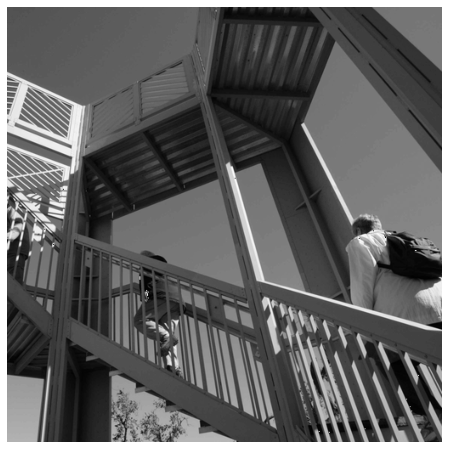

512
512


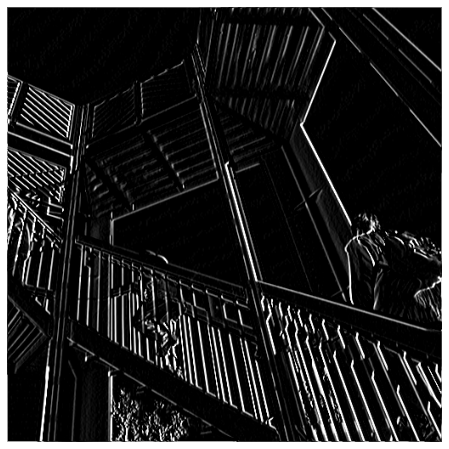

In [25]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=1, figsize=(8, 8))
plt.grid(False)
plt.gray()
plt.axis('off')

plt.imshow(img_ascent)
plt.show()

# reset plot
img_transformed = convoluted(img_ascent, filter_2, 1)
figure(num=1, figsize=(8, 8))
plt.grid(False)
plt.gray()
plt.axis('off')

plt.imshow(img_transformed)
plt.show()


In [5]:
def max_pooling(input_img):
  size_x = input_img.shape[0]
  size_y = input_img.shape[1]
  new_x = int(size_x/2)
  new_y = int(size_y/2)
  print(new_x)
  print(new_y)

  newImage = np.zeros((new_x, new_y))
  for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
      pixels = []
      pixels.append(input_img[x, y])
      pixels.append(input_img[x+1, y])
      pixels.append(input_img[x, y+1])
      pixels.append(input_img[x+1, y+1])
      pixels.sort(reverse=True)
      newImage[int(x/2),int(y/2)] = pixels[0]
  return newImage    

256
256


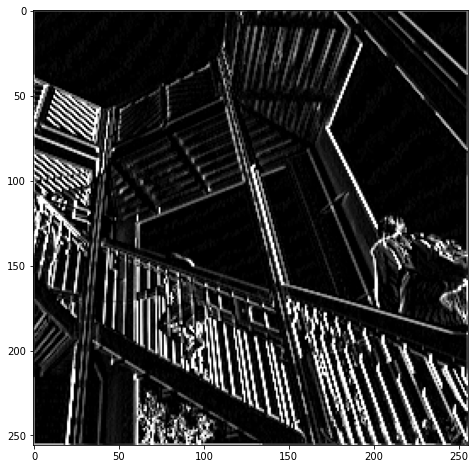

In [31]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=1, figsize=(8, 8))
plt.grid(False)
plt.gray()
#plt.axis('off')

img_max_pooling = max_pooling(img_transformed)
plt.imshow(img_max_pooling)
plt.show()